<a href="https://colab.research.google.com/gist/Sbdk24/e1f27d16fc8cd0775d350455d2cd64c2/fourier-transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

##Transormada de Fourier (Frecueincia tiempo continuo)

Esto ocurre cuando la forma funcional de tu serie temporal se conoce analíticamente (es decir, tienes una fórmula $x(t)=...$ para ella) y va desde $-\infty$ hasta $\infty$.

$$\hat{x}(f) = \int_{-\infty}^{\infty} x(t) e^{-2 \pi i f t} dt $$

**Resolviendo Analíticamente (Si es Posible)**: En algunos casos no será posible desarrollarlo de está manera usando este software, pero para este trabajo final, mostraremos la forma en que se desarrolla la transformada de fourier analisticamente usando python

In [ ]:
plt.style.use(['classic', 'grayscale'])

In [ ]:
t, f = smp.symbols('t, f', real=True)

In [ ]:
t, f = smp.symbols('t, f', real=True)
k = smp.symbols('k', real=True, positive=True)
x = smp.exp(-k * t**2) * k * t
x

k*t*exp(-k*t**2)

In [ ]:
from sympy.integrals.transforms import fourier_transform

In [ ]:
x_FT = fourier_transform(x, t, f)
x_FT

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

**Resolviendo Numéricamente**: A veces, sympy no puede evaluar integrales analíticamente, en cuyo caso necesitarás utilizar scipy.

In [ ]:
# Won't run
#x = smp.exp(-k * t**2) * smp.sin(k*t) * t**4
#fourier_transform(x, t, f)

In [ ]:
from scipy.integrate import quad

Define la función de la cual queremos calcular la transformada de Fourier y la función para calcular la transformada de Fourier.

In [ ]:
def x(t, k):
    return np.exp(-k * t**2) * np.sin(k*t) * t**4

def get_x_FT(x, f, k):
    x_FT_integrand_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_integrand_comp = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_real = quad(x_FT_integrand_real, -np.inf, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, -np.inf, np.inf)[0]
    return x_FT_real + 1j*x_FT_comp

Obtén las frecuencias y los valores de la transformada de Fourier.

In [ ]:
f = np.linspace(-4, 4, 100)
x_FT = np.vectorize(get_x_FT)(x, f, k=2)

Hacer el Plot

Text(0.5, 0, '$f$')

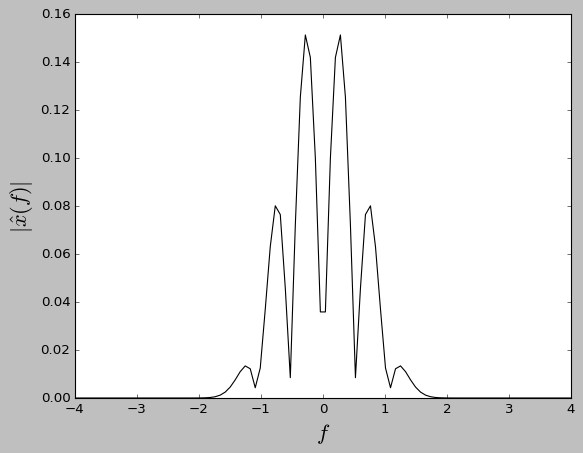

In [ ]:
plt.plot(f, np.abs(x_FT))
plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)

##2. Transformada Discreta de Fourier (Tiempo Discreto, Frecuencia Discreta)
Aquí consideramos una serie temporal discreta $x_t$ que se mide durante un tiempo finito ($N$ mediciones en un tiempo $T$ implica $N\Delta t = T$). La transformada de Fourier aquí está definida como

$$\hat{x}(f_n) = \sum_{k=0}^{N-1} x_t e^{-2 \pi i f_n (k \Delta t)} \hspace{10mm} f_n=\frac{n}{N\Delta t}$$

donde $f_n$ son las llamadas frecuencias de Fourier. La notación se puede simplificar como

$$\hat{x}_n = \sum_{k=0}^{N-1} x_t e^{-2 \pi i kn/N}$$

Observa que obtenemos $\hat{x}n = \hat{x}{n \pm N} = \hat{x}_{n \pm 2N} = ...$ con esta definición. Con esto, podemos restringirnos desde $n=0$ hasta $n=N-1$ y no perder ninguna información. O también podemos restringirnos a

En el caso de que $N$ sea par, $n=-N/2$ hasta $n=N/2-1$
En el caso de que $N$ sea impar, $n=-(N-1)/2$ hasta $(N-1)/2$
Esto es precisamente lo que hace scipy, devolviendo una matriz $\hat{x}_n$ correspondiente a las frecuencias

f = [0, 1, ..., N/2-1, -N/2, ..., -1] / (dt*N) si N es par

f = [0, 1, ..., (N-1)/2, -(N-1)/2, ..., -1] / (dt*N) si N es impar

¿Por qué hace esto? Bueno, típicamente se trabaja con series temporales reales $x_t$, y hay una identidad útil

$$\hat{x}_n = \hat{x}_{-n}^*$$

Así que solo es necesario examinar la primera mitad de las frecuencias para conocer todo acerca de la transformada de Fourier $\hat{x}_n$.



In [ ]:
T = 40 #seconds
N = 100 #measurements
t = np.linspace(0, T, N)
dt = np.diff(t)[0]

Observa algunas frecuencias particulares.

In [ ]:
f1 = 20/(N*dt)
f2 = 10/(N*dt)
f3 = (10+5*N)/(N*dt)

Obtén algunas series temporales:

In [ ]:
x1 = np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t) + 0.3*np.random.randn(len(t))
x2 = np.sin(2*np.pi*f2*t)+ 0.1*np.random.randn(len(t))
x3 = np.sin(2*np.pi*f3*t)+ 0.1*np.random.randn(len(t))

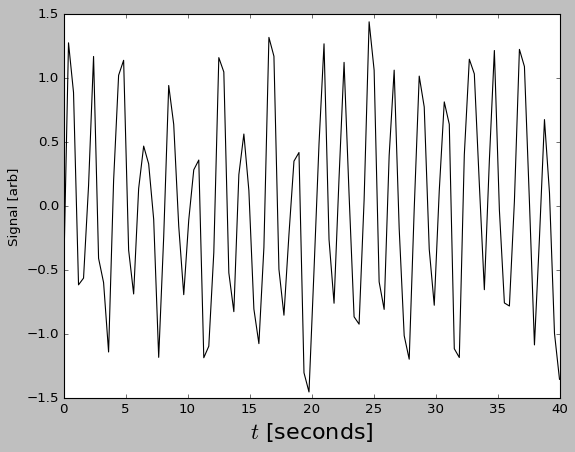

In [ ]:
plt.plot(t, x1)
plt.xlabel('$t$ [seconds]', fontsize=20)
plt.ylabel('Signal [arb]')
plt.show()

In [ ]:
f = fftfreq(len(t), np.diff(t)[0])
x1_FFT = fft(x1)

Grafica la primera mitad del espectro (para $x(t)$ real, toda la información está contenida en la primera mitad).

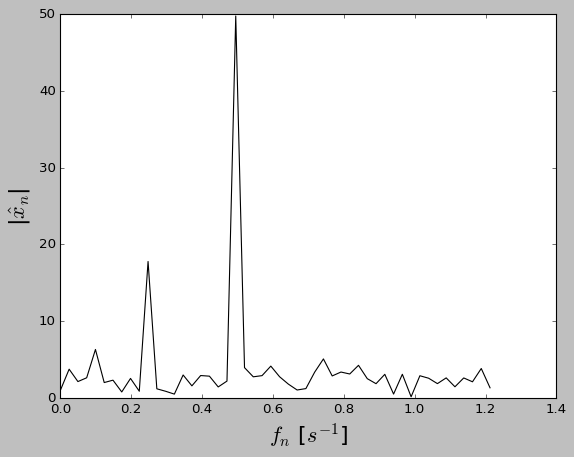

In [ ]:
plt.plot(f[:N//2], np.abs(x1_FFT[:N//2]))
plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
plt.ylabel('|$\hat{x}_n$|', fontsize=20)
plt.show()

Demuestra que $\hat{x}_n = \hat{x}_{n+5N}$ aquí:

In [ ]:
print(f2)
print(f3)

0.24750000000000003
12.6225


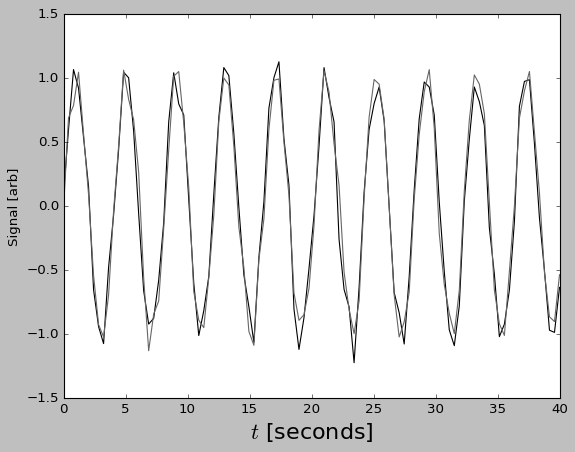

In [ ]:
plt.plot(t,x2)
plt.plot(t,x3)
plt.xlabel('$t$ [seconds]', fontsize=20)
plt.ylabel('Signal [arb]')
plt.show()

In [ ]:
x2_FFT = fft(x2)
x3_FFT = fft(x3)

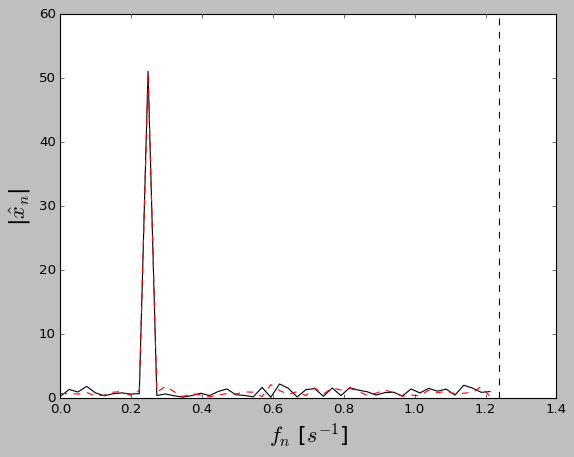

In [ ]:
plt.plot(f[:N//2], np.abs(x2_FFT[:N//2]), label='$x_2$')
plt.plot(f[:N//2], np.abs(x3_FFT[:N//2]), 'r--', label='$x_3$')
plt.axvline(1/(2*dt), ls='--', color='k')
plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
plt.ylabel('|$\hat{x}_n$|', fontsize=20)
plt.show()